# League of legends winner predicition

## Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

### Data understanding

In [4]:
# Import the data
df = pd.read_csv('./Challenger_Ranked_Games.csv')

print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:", df.dtypes)

Dataset Shape: (26904, 50)

Columns: ['gameId', 'gameDuration', 'blueWins', 'blueFirstBlood', 'blueFirstTower', 'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor', 'blueDragonKills', 'blueBaronKills', 'blueTowerKills', 'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills', 'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold', 'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel', 'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal', 'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower', 'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor', 'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills', 'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist', 'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills', 'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills', 'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt']

Data Types: gameId                       int64
gameDuration    

* This data contains key information that can affect the win or loss in the game.

* League of Legends includes objects, champions, and minions.

* Objects here represent dragons, barons, messengers, towers, suppressors, and more.

* The heart of the data is the result of the match between the blue and red teams.

* Therefore, the factor analysis that affects the win or loss of the game and the methodology to predict the win or loss of the game will be the most important points in analyzing the data.

### Data Quality Assesment

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values:")
print(missing_values)
print("\nMissing Percentage:")
print(missing_percentage)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

# Check for outliers in numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

Missing Values:
gameId                     0
gameDuration               0
blueWins                   0
blueFirstBlood             0
blueFirstTower             0
blueFirstBaron             0
blueFirstDragon            0
blueFirstInhibitor         0
blueDragonKills            0
blueBaronKills             0
blueTowerKills             0
blueInhibitorKills         0
blueWardPlaced             0
blueWardkills              0
blueKills                  0
blueDeath                  0
blueAssist                 0
blueChampionDamageDealt    0
blueTotalGold              0
blueTotalMinionKills       0
blueTotalLevel             0
blueAvgLevel               0
blueJungleMinionKills      0
blueKillingSpree           0
blueTotalHeal              0
blueObjectDamageDealt      0
redWins                    0
redFirstBlood              0
redFirstTower              0
redFirstBaron              0
redFirstDragon             0
redFirstInhibitor          0
redDragonKills             0
redBaronKills              

### Target Variable Analysis

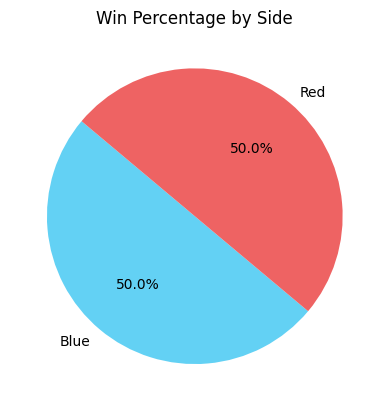

In [6]:
labels = ['Blue', 'Red']
sizes = [df['blueWins'].mean(),  df['redWins'].mean()]
colors = ['#63D1F4', '#EE6363']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        colors=colors, startangle=140)
plt.title("Win Percentage by Side")
plt.show()

### Game Duration Analysis

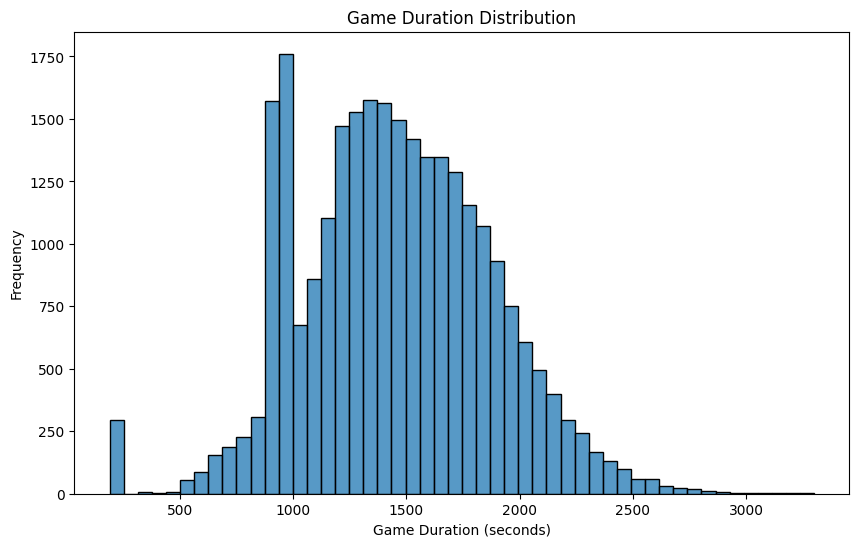

Average Game Duration by Winner: blueWins
0    1449.251450
1    1448.056043
Name: gameDuration, dtype: float64


In [7]:
# Analyze game duration patterns
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='gameDuration', bins=50)
plt.title('Game Duration Distribution')
plt.xlabel('Game Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Calculate average game duration by winner
duration_by_winner = df.groupby('blueWins')['gameDuration'].mean()
print(f"Average Game Duration by Winner: {duration_by_winner}")

### Team performance metrics analysis

C:\Users\MohamedOsama\AppData\Local\Temp\ipykernel_9000\635199051.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Blue Team', 'Red Team'])
C:\Users\MohamedOsama\AppData\Local\Temp\ipykernel_9000\635199051.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Blue Team', 'Red Team'])
C:\Users\MohamedOsama\AppData\Local\Temp\ipykernel_9000\635199051.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 2].set_xticklabels(['Blue Team', 'Red Team'])
C:\Users\MohamedOsama\AppData\Local\Temp\ipykernel_9000\635199051.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels

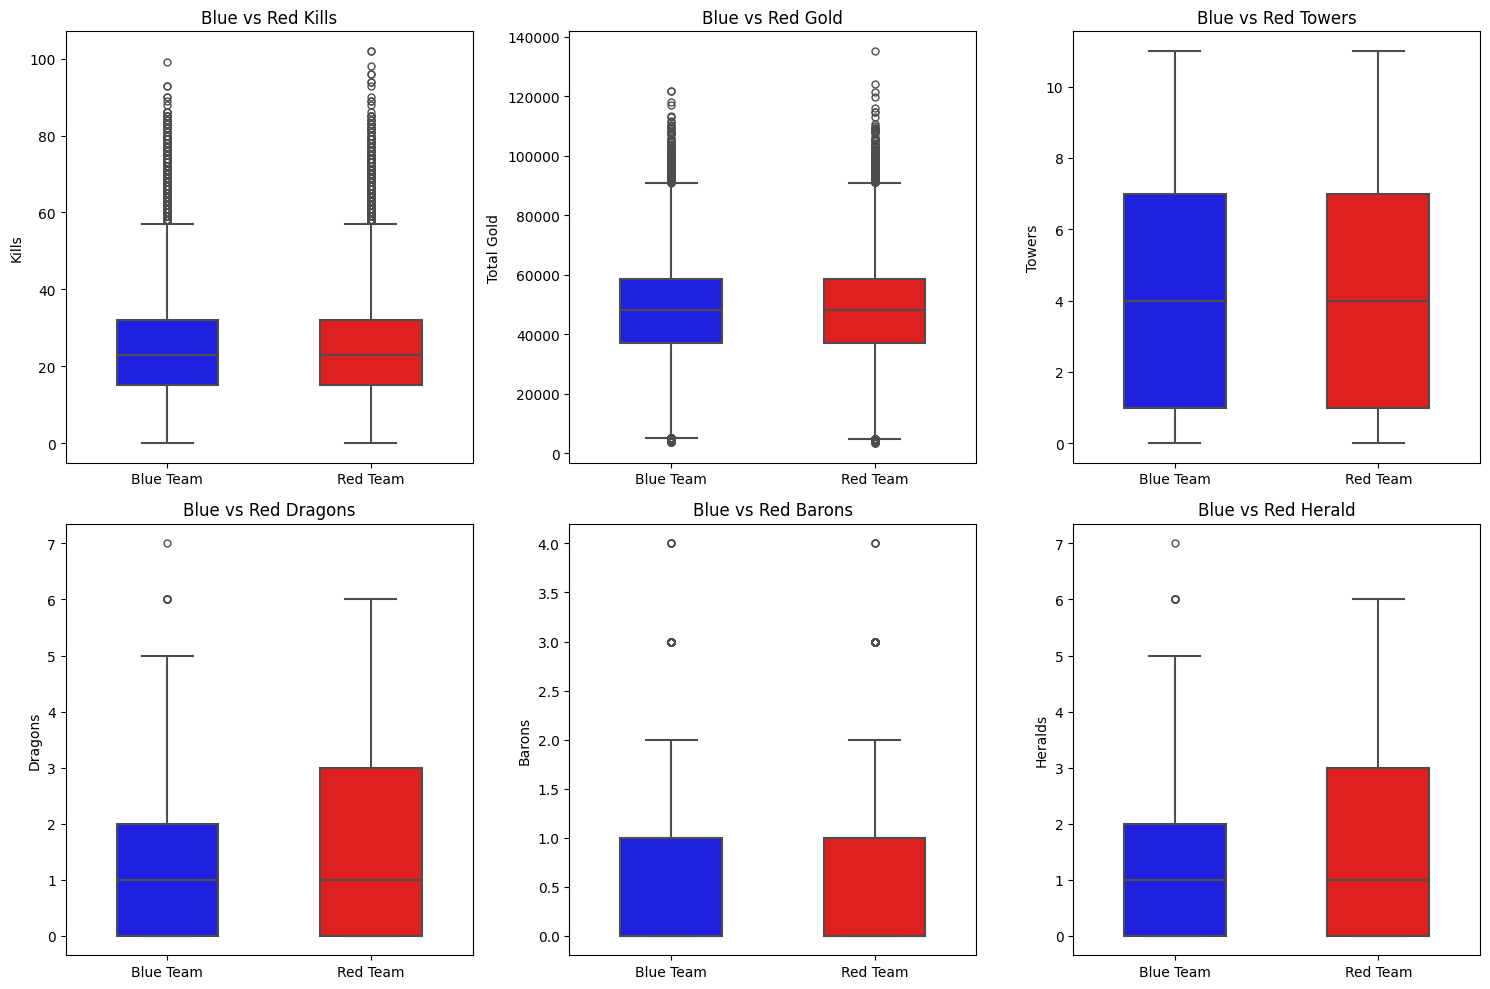

In [8]:
# Create box plots for team comparisons
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot blue vs red kills
sns.boxplot(data=df[['blueKills', 'redKills']], 
            palette=['#0000ff', '#ff0000'],
            width=0.5,
            fliersize=5,
            linewidth=1.5,
            ax=axes[0, 0])
axes[0, 0].set_title('Blue vs Red Kills')
axes[0, 0].set_ylabel('Kills')
axes[0, 0].set_xticklabels(['Blue Team', 'Red Team'])

# Plot blue vs red gold
sns.boxplot(data=df[['blueTotalGold', 'redTotalGold']], 
            palette=['#0000ff', '#ff0000'],
            width=0.5,
            fliersize=5,
            linewidth=1.5,
            ax=axes[0, 1])
axes[0, 1].set_title('Blue vs Red Gold')
axes[0, 1].set_ylabel('Total Gold')
axes[0, 1].set_xticklabels(['Blue Team', 'Red Team'])

# Plot blue vs red towers
sns.boxplot(data=df[['blueTowerKills', 'redTowerKills']], 
            palette=['#0000ff', '#ff0000'],
            width=0.5,
            fliersize=5,
            linewidth=1.5,
            ax=axes[0, 2])
axes[0, 2].set_title('Blue vs Red Towers')
axes[0, 2].set_ylabel('Towers')
axes[0, 2].set_xticklabels(['Blue Team', 'Red Team'])

# Plot blue vs red dragons
sns.boxplot(data=df[['blueDragonKills', 'redDragonKills']], 
            palette=['#0000ff', '#ff0000'],
            width=0.5,
            fliersize=5,
            linewidth=1.5,
            ax=axes[1, 0])
axes[1, 0].set_title('Blue vs Red Dragons')
axes[1, 0].set_ylabel('Dragons')
axes[1, 0].set_xticklabels(['Blue Team', 'Red Team'])

# Plot blue vs red barons kills
sns.boxplot(data=df[['blueBaronKills', 'redBaronKills']], 
            palette=['#0000ff', '#ff0000'],
            width=0.5,
            fliersize=5,
            linewidth=1.5,
            ax=axes[1, 1])
axes[1, 1].set_title('Blue vs Red Barons')
axes[1, 1].set_ylabel('Barons')
axes[1, 1].set_xticklabels(['Blue Team', 'Red Team'])

# Plot blue vs red dragons kills
sns.boxplot(data=df[['blueDragonKills', 'redDragonKills']], 
            palette=['#0000ff', '#ff0000'],
            width=0.5,
            fliersize=5,
            linewidth=1.5,
            ax=axes[1, 2])
axes[1, 2].set_title('Blue vs Red Herald')
axes[1, 2].set_ylabel('Heralds') 
axes[1, 2].set_xticklabels(['Blue Team', 'Red Team'])

plt.tight_layout()
plt.show()

The metrics doesn't differ a lot from red to blue

### Blue vs Red Side

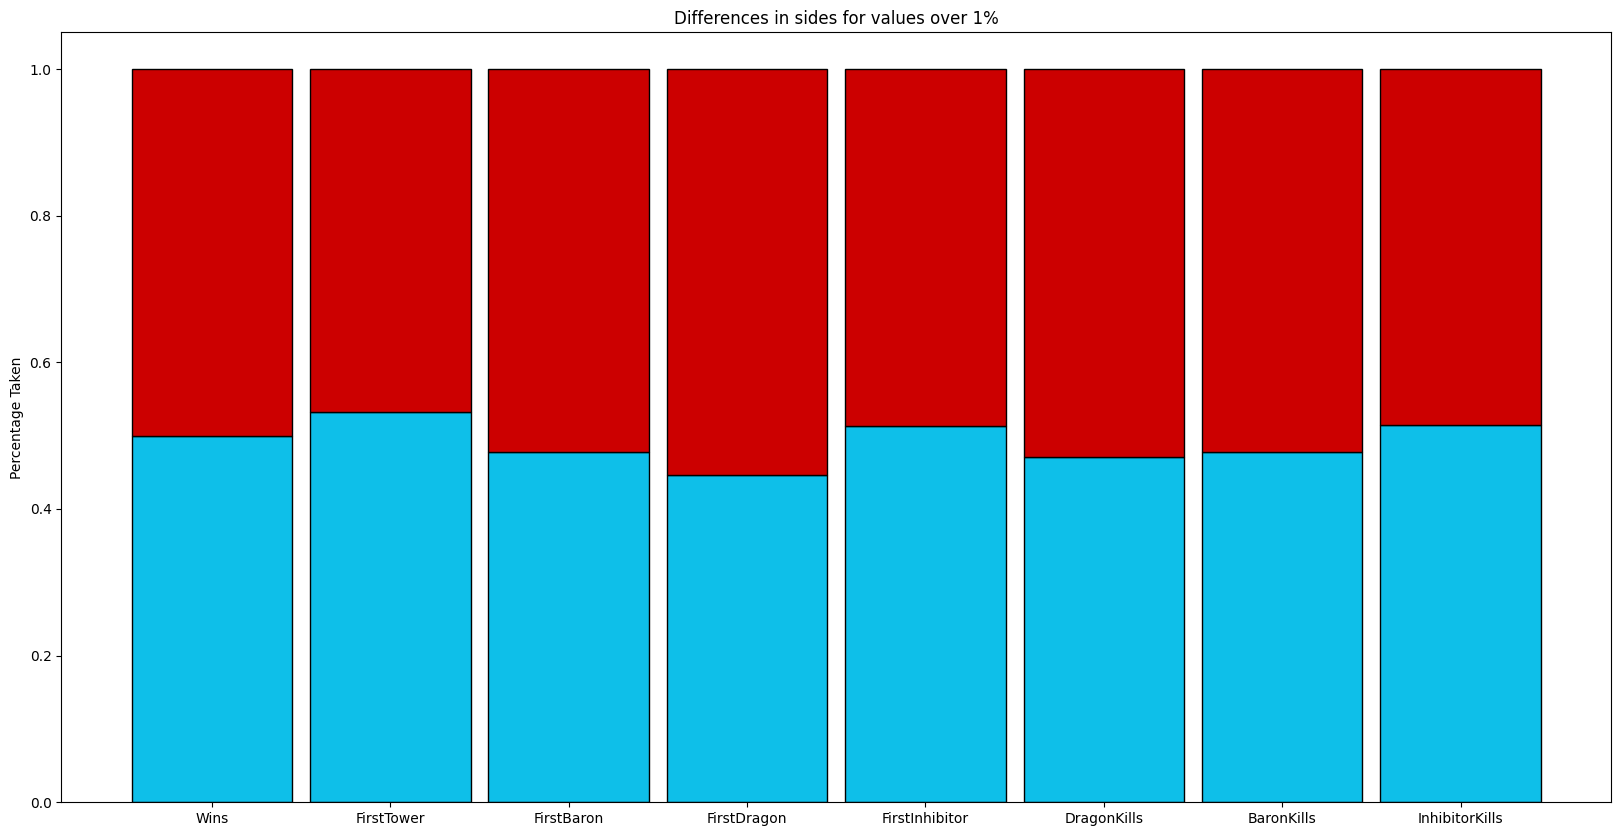

In [9]:
# Categories that are more important
categories = ['Wins', 'FirstBlood', 'FirstTower',
       'FirstBaron', 'FirstDragon', 'FirstInhibitor',
       'DragonKills', 'BaronKills', 'TowerKills',
       'InhibitorKills', 'WardPlaced', 'Wardkills', 'Kills',
       'Death', 'Assist', 'ChampionDamageDealt', 'TotalGold',
       'TotalMinionKills', 'TotalLevel', 'AvgLevel',
       'JungleMinionKills', 'KillingSpree', 'TotalHeal',
       'ObjectDamageDealt']


# Calculate the percentage of each category for each side
blue_percentage_data = {}

for category in categories:
    blue_total = df['blue'+category].sum()
    red_total = df['red'+category].sum()
    total = (blue_total + red_total).sum()
    
    blue_percent = blue_total/total
    red_percent = red_total/total
    
    blue_percentage_data[category] = blue_percent

# Calculate the percentage of each category for each side

# Decide which categories are more important
blue_over = {k:v for k,v in blue_percentage_data.items() if (abs(v-0.5)>0.01) or k=="Wins"}
red_over = {k:1-v for k,v in blue_over.items()}

y = range(len(blue_over))
plt.figure(figsize=(20,10))
barWidth = 0.9

# blue
plt.bar(y, list(blue_over.values()), color='#0EBFE9', edgecolor='black', width=barWidth)
# red
plt.bar(y, list(red_over.values()), bottom=list(blue_over.values()), color='#cc0000', edgecolor='black', width=barWidth)

# Custom x axis
plt.xticks(y, blue_over.keys())
plt.ylabel("Percentage Taken")
plt.title("Differences in sides for values over 1%")

# Show graphic
plt.show()


* The blue team got more first towers than red team
* The red team got more first barons, first dragons, dragon kills and baron kills
* The rest of the attributes they're mostly similar with a difference below 0.01%

### Correlation between red winning and other factors

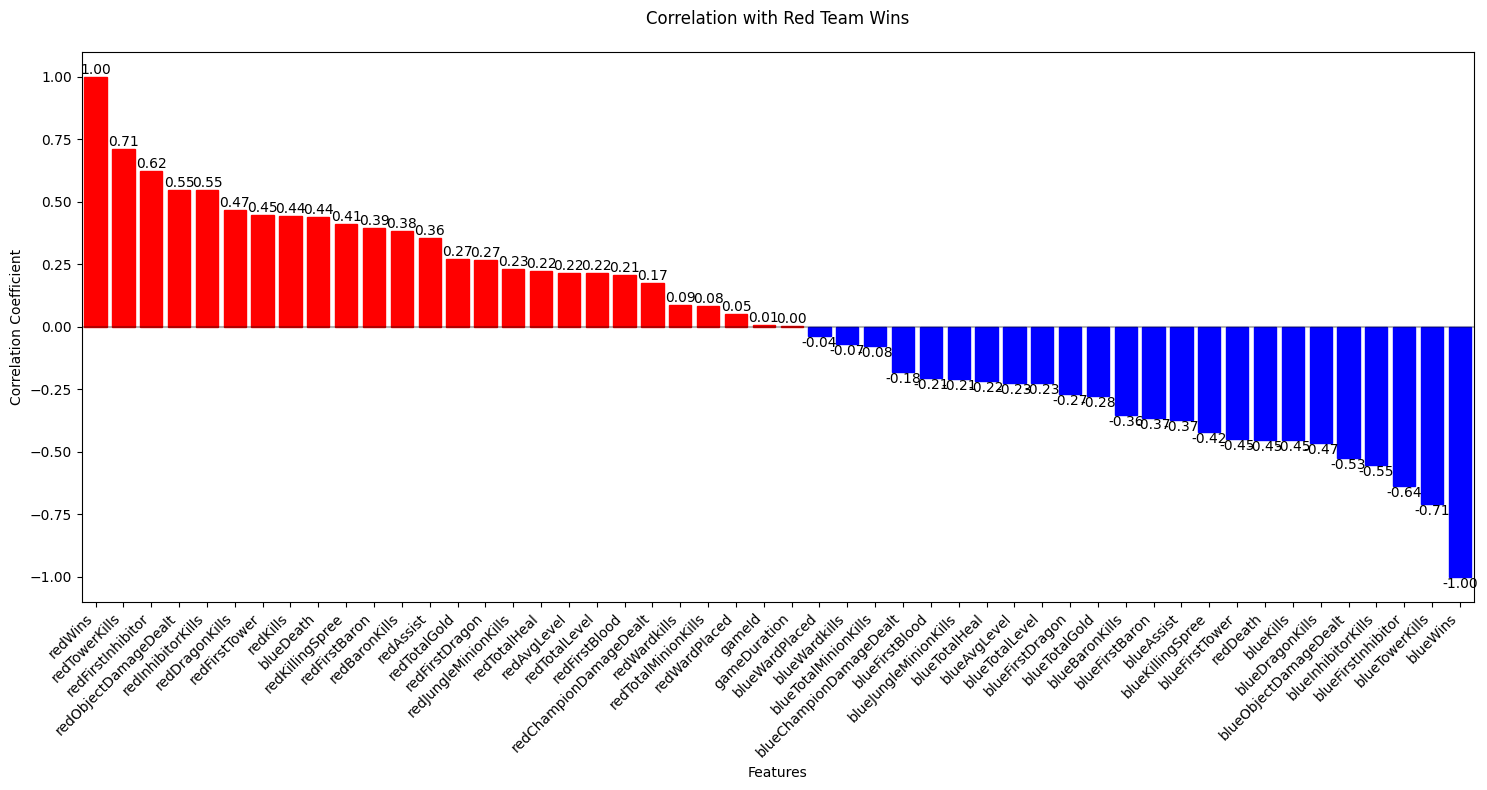

In [64]:
# Get correlations
correlations = df.corr()['redWins'].sort_values(ascending=False)

# Create a more detailed visualization
plt.figure(figsize=(15, 8))
sns.barplot(x=correlations.index, y=correlations.values)

# Customize the plot
plt.title('Correlation with Red Team Wins', pad=20)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Color the bars based on correlation value
for i, v in enumerate(correlations.values):
    if v > 0:
        plt.gca().patches[i].set_color('red')
    else:
        plt.gca().patches[i].set_color('blue')

# Add correlation values on top of bars
for i, v in enumerate(correlations.values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')

plt.tight_layout()